In [83]:
# Up-sampling effort: randomly duplicating observations from the minority class 
# to reinforce its signal

In [84]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [85]:
# module for resampling
from sklearn.utils import resample

In [86]:
# os.getcwd()

In [87]:
# os.listdir(os.getcwd())

In [88]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_merged_nan_removed.csv")
all_param_df.shape


(31686, 357)

In [89]:
# separate classes in dataframes of success/failure
df_fail = all_param_df[all_param_df.suc_class==0]
df_succ = all_param_df[all_param_df.suc_class==1]

In [90]:
df_fail.shape

(30883, 357)

In [91]:
df_succ.shape

(803, 357)

In [92]:
# Upsaple Minority class
df_succ_upsampled = resample(df_succ, replace=True, n_samples=30000, random_state=2)

# combine failed with upsampled minority class into new dataframe
df_upsampled = pd.concat([df_fail, df_succ_upsampled])

# display new class counts
df_upsampled.suc_class.value_counts()

0    30883
1    30000
Name: suc_class, dtype: int64

In [93]:
# # reindex the new upsampled dataframe
# df_upsampled.reindex()

In [94]:
# df_upsampled

In [95]:
# # read the csv y_data file into Pandas 
# y_parm_df = pd.read_csv("reduced_data\\y_params.csv")
# y_parm_df.shape

In [96]:
# using binary classification for logistic regression
y_class = df_upsampled['suc_class']

In [97]:
y_class

1        0
2        0
3        0
4        0
5        0
        ..
4638     1
17790    1
1441     1
1207     1
1198     1
Name: suc_class, Length: 60883, dtype: int64

In [98]:
# create new X parameters df
x_data = df_upsampled.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [99]:
x_data.shape

(60883, 346)

In [100]:
#label encode the developer name

In [101]:
x_data['developer']=x_data['developer'].astype('category')

In [102]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
1,0,18255,Valve,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18255,Valve,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18255,Valve,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6704,Valve,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,18255,Valve,499,90,0,581,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#label encode the publisher name

In [104]:
x_data['publisher']=x_data['publisher'].astype('category')

In [105]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
1,0,18255,15348,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18255,15348,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18255,15348,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6704,15348,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,18255,15348,499,90,0,581,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [107]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [108]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

# from sklearn.preprocessing import MinMaxScaler
# x_scaler = MinMaxScaler().fit(X_train)

In [109]:
# apply the trained scales (MinMax) to the training and testing data

# X_train_scaled = x_scaler.transform(X_train)
# X_test_scaled = x_scaler.transform(X_test)

In [110]:
# Instantiate and Train model
y = y_train
X = X_train

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [111]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test, y_test)}")

Training Data Score: 0.8717971179536596
Testing Data Score: 0.8754352539254977


In [112]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7671
           1       0.90      0.84      0.87      7550

    accuracy                           0.88     15221
   macro avg       0.88      0.88      0.88     15221
weighted avg       0.88      0.88      0.88     15221



In [113]:
# thinking about baseline results:
# Support is balanced due to sampling adjustments
# Percision: for no success: 90%, better for successful games: 93%
# Recall: Fraction of positives found, 94% for 0, 89% for 1
# f1 score: 92%

<AxesSubplot:>

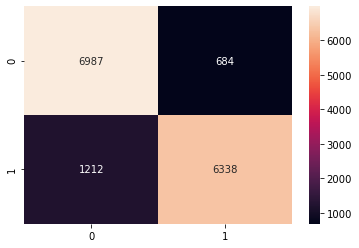

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [115]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
84,tagbasketball,0.024004
261,tagilluminati,0.022344
324,tagwordgame,0.021361
53,tagsoccer,0.021239
134,tagclassbased,0.020409
148,tagepisodic,0.020053
247,tagmartialarts,0.018357
219,tagremake,0.016972
71,tagmoba,0.013996
182,tagmechs,0.013742


In [116]:
# Apply Area Under ROC Curve scoring model (AUROC)
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = clf_1.predict_proba(X_test)
prob_y_2

array([[8.29359152e-01, 1.70640848e-01],
       [7.86829265e-01, 2.13170735e-01],
       [1.82246602e-02, 9.81775340e-01],
       ...,
       [9.57161961e-09, 9.99999990e-01],
       [5.47410577e-02, 9.45258942e-01],
       [8.64900867e-01, 1.35099133e-01]])

In [117]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [118]:
# Print AUROC of SMOTE model
# ROC is a probability curve and AUC represents the degree or measure of separability. 
# It tells how much the model is capable of distinguishing between classes. 
# Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
print( roc_auc_score(y_test, prob_y_2) )

0.9236167349119975


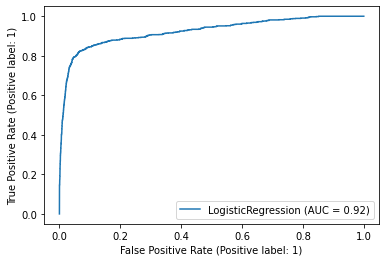

In [119]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_1, X_test, y_test)  
plt.show()